In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# mnist

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

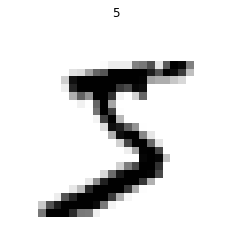

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 0

some_digit = X[i]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.title(y[i])
plt.axis("off")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [6]:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits.
y_test_5 = (y_test == '5')

In [7]:
# set(y_test_5)

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
sgd_clf.predict([X[i]])

array([ True])

In [10]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone
# skfolds = StratifiedKFold(n_splits=3, random_state=42)

# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = y_train_5[train_index]
#     X_test_fold = X_train[test_index]
#     y_test_fold = y_train_5[test_index]
#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == y_test_fold)
#     print(n_correct / len(y_pred))

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# array([ 0.9502 , 0.96565, 0.96495])

array([0.9695 , 0.9681 , 0.96445])

In [12]:
# What is the accuracy when our classifier always predicts not 9

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [14]:
# cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


array([[54116,   463],
       [ 1496,  3925]], dtype=int64)

In [16]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred)

(0.8944849589790337, 0.7240361556908319)

In [17]:
# harmonic average of the above:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.8002854521357937

In [18]:
# precision vs recall
y_scores = sgd_clf.decision_function([some_digit])
y_scores


array([6140.51091413])

In [19]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [20]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

In [22]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

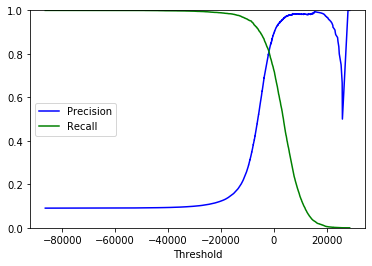

In [23]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[1:],"b",label="Precision")
    plt.plot(thresholds, recalls[1:],"g",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

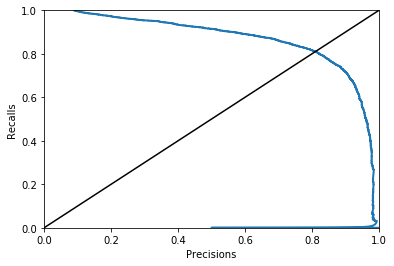

0.8682043139662231

In [24]:
from sklearn.metrics import auc

def plot_precision_recall_curve(precisions, recalls, label=None):
    plt.plot(precisions, recalls, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Precisions')
    plt.ylabel('Recalls')

plot_precision_recall_curve(precisions, recalls)
plt.show()


auc = auc(recalls, precisions)
auc

In [25]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

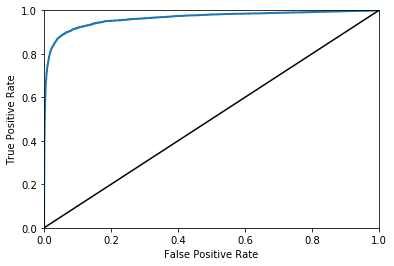

In [26]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9640680945554707

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")

C:\Users\eszistv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\eszistv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\eszistv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

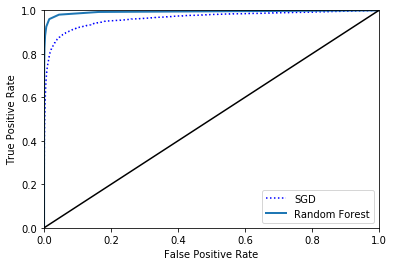

0.9929847901272992

In [30]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()
roc_auc_score(y_train_5, y_scores_forest)

In [31]:
# other functions:

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit]) , forest_clf.predict_proba([some_digit])

C:\Users\eszistv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(array(['5'], dtype=object), array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]]))

In [32]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87267546, 0.88579429, 0.87878182])

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\eszistv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\eszistv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.91196761, 0.89029451, 0.90448567])

In [34]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train,cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\eszistv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\eszistv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5594,    0,   15,    7,    7,   45,   33,    6,  214,    2],
       [   0, 6421,   38,   22,    4,   42,    4,    8,  193,   10],
       [  28,   28, 5264,   94,   66,   23,   65,   40,  341,    9],
       [  28,   16,  113, 5275,    2,  208,   24,   38,  354,   73],
       [  12,   14,   47,   11, 5230,   10,   36,   25,  301,  156],
       [  31,   19,   30,  153,   58, 4508,   74,   18,  462,   68],
       [  27,   17,   47,    3,   45,   92, 5555,    5,  127,    0],
       [  18,   11,   49,   30,   50,   13,    4, 5728,  159,  203],
       [  16,   65,   39,  102,    2,  124,   32,    9, 5415,   47],
       [  23,   22,   28,   62,  120,   36,    1,  178,  334, 5145]],
      dtype=int64)

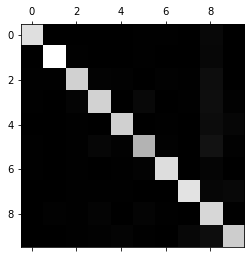

In [35]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [36]:
# lets normalize the plot with the sample size
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

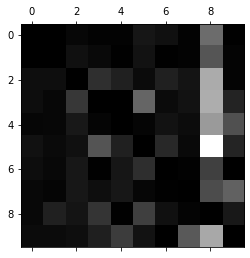

In [37]:
# lets fill the diagonal with zeros and plot the normalized conf matrix

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()



In [38]:
# seems that the classifier mixes up the 3 and 5 with each pther so lets plot them against each other
# the left side shows the digits classified as 3 the right are the 5 classified digits
# the upper row shows the actual 3s and the lower row contains the actual 5s
# we are plotting only 25 samples for each 4 category

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-38-14830022e8ca>, line 12)

In [ ]:
# Multilabel classification

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
knn_clf.predict([some_digit])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

In [ ]:
##############################
# Multioutput Classification #
##############################

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

In [ ]:
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)